# TASK 3 - ASSIGNMENT 2

* MRUTULA SURESH
* 28967828

### PACKAGES IMPORTED

    * Pandas
    * matplotlib
    * numpy
    * preprocessing from sklearn
    * sklearn
    * RandomizedSearchCV from sklearn.model_selection
    * train_test_split from sklearn.cross_validation
    * LinearRegression

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import preprocessing


In [37]:
# read the dataframe
prop = pd.read_csv('dataset3_with_missing.csv')

In [64]:
prop.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


### From the dataframe we can see that sum of  <font color="blue">'sqft_above'</font> and  <font color="blue">'sqft_basement'</font> is equal to  <font color="blue"> 'sqft_living'</font>

In [38]:
prop['sqft_living'] = prop['sqft_above'] + prop['sqft_basement']
prop['sqft_above'] = prop['sqft_living'] - prop['sqft_basement']
prop['sqft_basement'] =  prop['sqft_living'] - prop['sqft_above']

In [39]:
# replacing the empty values with 0
prop.sqft_above.fillna(0,inplace = True)
prop.sqft_basement.fillna(0,inplace = True)
prop.sqft_living.fillna(0,inplace = True)

In [41]:
# checking the correlation matrix
prop.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.014564,0.008047,0.020793,0.002508,-0.132662,0.017907,0.002519,0.018262,-0.022431,0.018304,0.000934,0.003423,0.021646,-0.011291,-0.015532,-0.000766,0.036036
price,-0.014564,1.000000,0.289969,0.519208,0.660720,0.073965,0.282874,0.245278,0.395862,0.050571,0.678502,0.567170,0.293586,0.053865,0.131691,-0.056634,0.321565,0.027493
bedrooms,0.008047,0.289969,1.000000,0.514071,0.536959,0.028608,0.186265,-0.012804,0.069658,0.037802,0.347806,0.430962,0.295375,0.179440,-0.006293,-0.168333,-0.020569,0.140035
bathrooms,0.020793,0.519208,0.514071,1.000000,0.757942,0.089978,0.518234,0.049306,0.170353,-0.117930,0.680954,0.680884,0.282901,0.514762,0.028738,-0.244012,0.006813,0.279304
sqft_living,0.002508,0.660720,0.536959,0.757942,1.000000,0.154349,0.380403,0.079852,0.255270,-0.064789,0.734757,0.876505,0.410065,0.337740,0.035068,-0.203782,0.049552,0.243258
sqft_lot,-0.132662,0.073965,0.028608,0.089978,0.154349,1.000000,0.001695,0.012080,0.042599,-0.014156,0.106982,0.165490,0.006072,0.061644,0.000736,-0.135944,-0.082236,0.219642
floors,0.017907,0.282874,0.186265,0.518234,0.380403,0.001695,1.000000,0.026699,0.023394,-0.270688,0.477359,0.553795,-0.261527,0.488938,0.001527,-0.097657,0.025549,0.180657
waterfront,0.002519,0.245278,-0.012804,0.049306,0.079852,0.012080,0.026699,1.000000,0.378977,0.012832,0.076015,0.052707,0.065491,-0.024224,0.079225,0.044026,-0.020109,-0.048514
view,0.018262,0.395862,0.069658,0.170353,0.255270,0.042599,0.023394,0.378977,1.000000,0.051365,0.248183,0.134374,0.274003,-0.057552,0.092071,0.104776,-0.008092,-0.094688
condition,-0.022431,0.050571,0.037802,-0.117930,-0.064789,-0.014156,-0.270688,0.012832,0.051365,1.000000,-0.152804,-0.175553,0.198447,-0.385652,-0.065882,0.029359,0.010063,-0.142110


#### From the correlation matrix we can see that BATHROOM is correlated highly with  bedrooms ,sqft_living,grade and yr_built

In [42]:
prop_out = prop[['bedrooms','sqft_living','grade','floors','yr_built','bathrooms']]

## LINEAR MODEL

In [59]:
# checking the R square score with linear model
lin_reg = LinearRegression()
data_without_null = prop_out[['bedrooms','sqft_living','grade','yr_built','bathrooms']].dropna()

X_train, X_test, y_train, y_test = train_test_split(data_without_null.iloc[:,:-1],data_without_null.iloc[:,-1:],test_size =0.33,random_state=111)
lin_reg.fit(X_train,y_train)
pred_test = lin_reg.predict(X_test)
pred_train = lin_reg.predict(X_train)
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train - lin_reg.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test - lin_reg.predict(X_test)) ** 2))


#r squared 
r_square = lin_reg.score(X_test,y_test)
print ('r-squared for this model = ',r_square)
adjusted_r_square = 1 - (1-lin_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print ('adjusted r-squared for this model = ',adjusted_r_square)

Fit a model X_train, and calculate MSE with Y_train: bathrooms    0.151091
dtype: float64
Fit a model X_train, and calculate MSE with X_test, Y_test: bathrooms    0.152363
dtype: float64
r-squared for this model =  0.6772585801962161
adjusted r-squared for this model =  0.6768491397651297


### The linear model has a r square score od 0.677 i.e 67.7% , checking if randomforest algorithm produces an improvement in the R square score

* Random forest has many parameters that needs tuning 

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
# randomforest model
rf = RandomForestRegressor()

data_without_null = prop_out[['bedrooms','sqft_living','grade','yr_built','bathrooms']].dropna()
# splitting that data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data_without_null.iloc[:,:-1],data_without_null.iloc[:,-1:],test_size =0.33,random_state=111)

# RandomizedSearchCV tries the various combinations and chooses the best parameter
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#performing a fit on the train data
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [45]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [49]:
# predicting the test data and checking the accuracy , R squared and adjusted r square

predictions = rf_random.predict(X_test)
errors = abs(predictions - y_test.values.ravel())
mape = 100 * np.mean(errors / y_test.values.ravel())
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

print('Fit a model X_test, and calculate MSE with X_test, Y_test:', np.mean((y_test.values.ravel() - rf_random.predict(X_test)) ** 2))

#r squared 
r_square = rf_random.score(X_test,y_test)
print ('r-squared for this model = ',r_square)
adjusted_r_square = 1 - (1-rf_random.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print ('adjusted r-squared for this model = ',adjusted_r_square)



Model Performance
Average Error: 0.2461 degrees.
Accuracy = 87.02%.
Fit a model X_test, and calculate MSE with X_test, Y_test: 0.10600021320177494
r-squared for this model =  0.775466099141316
adjusted r-squared for this model =  0.7751812480143149


### randomforest produced an increase in the R square score so i choose this algorithm over linear regression

Text(0,0.5,'residuals')

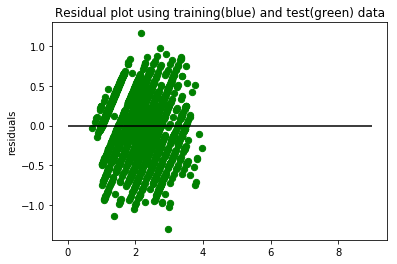

In [52]:
# residual plot
resi = predictions - y_test.values.ravel() 
plt.scatter(predictions,resi ,c ='g',s =40)
plt.hlines(y = 0,xmin = 0,xmax = 9)
plt.title('Residual plot using training(blue) and test(green) data')
plt.ylabel('residuals')

In [62]:
#predict the bathroom values for the entire dataframe and replace only the missing values
test_data = prop[['bedrooms','sqft_living','grade','yr_built']]
data = rf_random.predict(test_data)
bath_predicted = pd.DataFrame(data,columns = ['bath'])

#replace the missing values 

prop.bathrooms.fillna(bath_predicted.bath,inplace = True)

In [69]:
#This dataframe is saved as a csv file with utf-8 encoding 
prop.to_csv('dataset3_solution.csv', index = False,encoding = 'utf-8')

### Reference

* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74